# Studying the Titanic

To perform the data analysis, we'll be using the Titanic dataset from Kaggle.

This dataset is simple to understand and does not require any domain understanding
to derive insights.

This dataset contains the details of each passenger on the Titanic and also whether
they survived or not.


These are the questions that we'll answer:
- Which passenger class has the maximum number of survivors?
- What is the distribution, based on gender, of the survivors among the
different classes?
-  What is the distribution of the nonsurvivors among classes that have
relatives aboard the ship?
- What is the survival percentage among different age groups?

## Which passenger class has the maximum number of survivors?

we can construct a simple bar plot of the num of survivors and % of survivors in each class

In [23]:
import pandas as pd
import numpy as np
import pylab as plt
import os

In [30]:
#df = pd.read_csv('Macintosh HD⁩\Users⁩\⁨piramol⁩\⁨Documents\GitHub⁩\Mastering Python for Data Science⁩\⁩Data\⁨titanic\⁩train.csv')

In [34]:
df = pd.read_csv('Data/titanic/train.csv')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [37]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [38]:
# passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)

In [40]:
#Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors/total_passengers

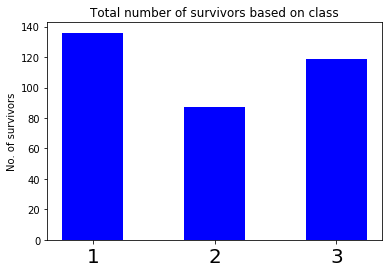

In [44]:
#plotting the total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(),survivors, color='blue', width =0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

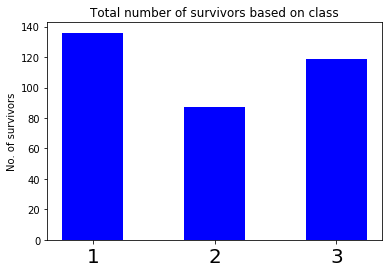

In [45]:
fig

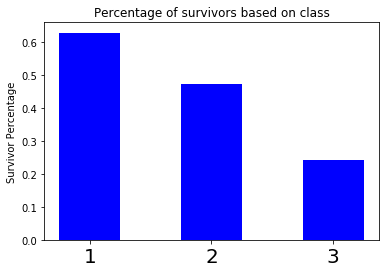

In [46]:
#Plotting the percentage of survivors in each class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(),
            survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

<b> What have we done so far? </b>
- In the preceding code, we performed a preliminary check for null values on the fields that are utilized. 
- After , we calculated the number of survivors and the percentage of survivors in each class. 
- Then, we plotted two bar charts for the total number of survivors and the percentage of survivors.

<b> These are our observations: </b>
- The maximum number of survivors are in the first and third class, respectively
- With respect to the total number of passengers in each class, first class has the maximum survivors at around 61%
- With respect to the total number of passengers in each class, third class has the minimum number of survivors at around 25%

<b> This is our key takeaway: </b>
- There was clearly a preference toward saving those from the first class as the
ship was drowning. It also had the maximum percentage of survivors

## What is the distribution of survivors based on gender among the various classes?

To answer this question, we'll use the following code to plot a side-by-side bar chart
to compare the survival rate and percentage among men and women with respect to
the class they were in.

In [47]:
# cheking for any null values
df['Sex'].isnull().value_counts()   
#if it is false it means there are 891 data points/passengers

False    891
Name: Sex, dtype: int64

In [48]:
#Male passengers who survived in each class
male_survivors = df[df['Sex']=='male'].groupby('Pclass')['Survived'].agg(sum)

In [49]:
#Total male passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()

In [50]:
male_survivor_percentage = male_survivors / male_total_passengers

In [51]:
# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

In [52]:
#Total Female Passengers in each clas
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors/female_total_passengers

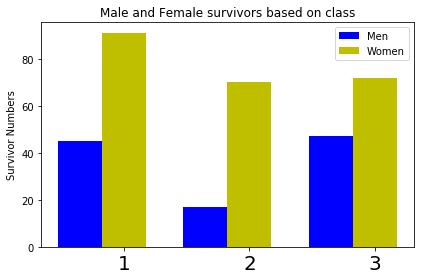

In [56]:
#Plotting the total passengers who survived based on Gender

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue',label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width,color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

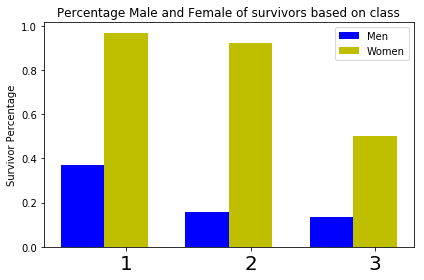

In [59]:
#Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width =0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

<b> What have we done so far? </b>
- In the preceding code, the number of male and female survivors is calculated and then a side-by-side bar plot is plotted.
- After that, the percentage of male and female survivors with respect to the total number of males and females in their respective
classes are taken and then plotted.

<b>These are our observations:</b>
- The majority of survivors are females in all the classes
- More than 90% of female passengers in first and second class survived
- The percentage of male passengers who survived in first and third class, respectively, are comparable

<b>This is our key takeaway:</b>
- Female passengers were given preference for lifeboats and the majority were saved.

## What was the survival percentage among different age groups?

For this question, we'll use the following code to plot pie charts to compare the
proportion of survivors in terms of number and percentage with respect to the
different age groups:

In [60]:
#checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [61]:
#Defining the age binning interval
age_bin = [0,18,25,40,60,100]

#creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

In [62]:
#removing the null rows
d_temp = df[np.isfinite(df['Age'])]    #removing all na instances

In [63]:
# number of survivors based on age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

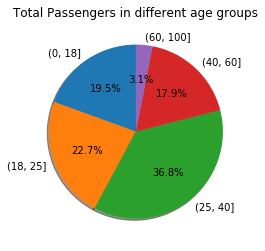

In [66]:
#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

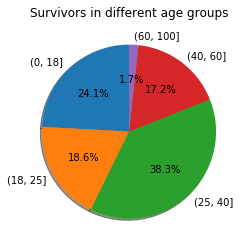

In [67]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

<b> What have we done so far? </b>
- In the code, we defined the bin with the age_bin variable and then added a column called AgeBin, 
    where bin values are filled using the cut function. 
- After this, we filtered out all the rows with the age set as null. 
- After this, we created two pie charts:
    -- one for the total number of passengers in each age group and 
    -- another for the number of survivors in each age group.

<b> These are our observations: </b>
- The 25-40 age group has the maximum number of passengers, and 0-18 has the second highest number of passengers
- Among the people who survived, the 18-25 age group has the second highest number of survivors
- The 60-100 age group has a lower proportion among the survivors

<b> This is our key takeaway: </b>
- The 25-40 age group had the maximum number of survivors compared to any other age group, and people who were old were either not lucky enough or made way for the younger people to the lifeboats.